In [1]:
library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)
library(RColorBrewer)
library(dplyr)

state_crash <- read.csv("Datasets/CRASH_2016_Statewide.csv",
                       encoding='latin-1')
head(state_crash)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



CRN,DISTRICT,COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,⋯,BICYCLE_MAJ_INJ_COUNT,PED_COUNT,PED_DEATH_COUNT,PED_MAJ_INJ_COUNT,MAX_SEVERITY_LEVEL,COMM_VEH_COUNT,DEC_LAT,DEC_LONG,RDWY_SURF_TYPE_CD,COUNTY_YEAR
2016000742,6,46,46220,68K01,2016,1,1,1558,15,⋯,0,0,0,0,0,0,40.0726,-75.3467,NA,CRASH_2016_Montgomery
2016004102,6,46,46217,68K03,2016,1,7,2211,22,⋯,0,0,0,0,0,0,40.2970,-75.5208,NA,CRASH_2016_Montgomery
2016004143,6,9,9207,09502,2016,1,4,1205,12,⋯,0,0,0,0,8,1,40.4069,-75.2592,NA,CRASH_2016_Bucks
2016004176,6,46,46416,46416,2016,1,2,2309,23,⋯,0,0,0,0,8,0,40.2433,-75.6200,NA,CRASH_2016_Montgomery
2016005228,5,45,45213,68N06,2016,1,1,52,0,⋯,0,0,0,0,9,0,40.9983,-75.1506,NA,CRASH_2016_Monroe
2016008524,4,35,35218,35218,2016,1,5,822,8,⋯,0,0,0,0,0,0,41.5010,-75.6246,NA,CRASH_2016_Lackawanna


In [2]:
state_pop <- read.csv("Datasets/PA_pop.csv",
                       encoding='latin-1')
head(state_pop)

SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,⋯,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
50,42,1,Pennsylvania,Adams County,1,0,101407,49865,51542,⋯,3134,2558,154,125,127,97,26,21,10,3
50,42,1,Pennsylvania,Adams County,1,1,5594,2847,2747,⋯,399,341,30,16,12,10,3,2,0,1
50,42,1,Pennsylvania,Adams County,1,2,6096,3123,2973,⋯,392,321,17,16,16,8,1,1,1,0
50,42,1,Pennsylvania,Adams County,1,3,6512,3257,3255,⋯,308,278,14,17,18,9,1,2,1,0
50,42,1,Pennsylvania,Adams County,1,4,7507,3753,3754,⋯,285,262,21,17,12,18,2,2,2,0
50,42,1,Pennsylvania,Adams County,1,5,6588,3373,3215,⋯,325,226,21,10,13,5,4,1,1,0


In [3]:
state_pop$CTYNAME <- as.character(state_pop$CTYNAME)


In [4]:
state_pop$CTYNAME = substr(state_pop$CTYNAME,1,nchar(state_pop$CTYNAME)-7)
head(state_pop)

SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,⋯,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
50,42,1,Pennsylvania,Adams,1,0,101407,49865,51542,⋯,3134,2558,154,125,127,97,26,21,10,3
50,42,1,Pennsylvania,Adams,1,1,5594,2847,2747,⋯,399,341,30,16,12,10,3,2,0,1
50,42,1,Pennsylvania,Adams,1,2,6096,3123,2973,⋯,392,321,17,16,16,8,1,1,1,0
50,42,1,Pennsylvania,Adams,1,3,6512,3257,3255,⋯,308,278,14,17,18,9,1,2,1,0
50,42,1,Pennsylvania,Adams,1,4,7507,3753,3754,⋯,285,262,21,17,12,18,2,2,2,0
50,42,1,Pennsylvania,Adams,1,5,6588,3373,3215,⋯,325,226,21,10,13,5,4,1,1,0


In [5]:
state_pop <- sapply(state_pop, tolower)
head(state_pop)

SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,⋯,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
50,42,1,pennsylvania,adams,1,0,101407,49865,51542,⋯,3134,2558,154,125,127,97,26,21,10,3
50,42,1,pennsylvania,adams,1,1,5594,2847,2747,⋯,399,341,30,16,12,10,3,2,0,1
50,42,1,pennsylvania,adams,1,2,6096,3123,2973,⋯,392,321,17,16,16,8,1,1,1,0
50,42,1,pennsylvania,adams,1,3,6512,3257,3255,⋯,308,278,14,17,18,9,1,2,1,0
50,42,1,pennsylvania,adams,1,4,7507,3753,3754,⋯,285,262,21,17,12,18,2,2,2,0
50,42,1,pennsylvania,adams,1,5,6588,3373,3215,⋯,325,226,21,10,13,5,4,1,1,0


In [6]:
stateFromLower <-function(x) {
   #read 52 state codes into local variable [includes DC (Washington D.C. and PR (Puerto Rico)]
  st.codes<-data.frame(
                      state=as.numeric(c("1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11",
                                         "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22",
                                         "23", "24", "25", "26",  "27", "28", "29", "30", "31", "32", "33",
                                         "34", "35", "36", "37", "38", "39", "40", "41", "42", "43", "44",
                                         "45", "46", "47", "48", "49", "50", "51", "52","53","54","55","56",
                                         "57","58","59","60","61","62","63","64","65","66","67")),
                      full=as.factor(c("adams","allegheny","armstrong","beaver","bedford","berks",
                                       "blair","bradford","bucks","butler","cambria",
                                       "cameron","carbon","centre","chester","clarion","clearfield","clinton",
                                       "columbia","crawford","cumberland","dauphin","delaware","elk",
                                       "erie","fayette","forest","franklin","fulton",
                                       "greene","huntingdon","indiana","jefferson","juniata",
                                       "lackawanna","lancaster","lawrence","lebanon","lehigh","luzerne",
                                       "lycoming","mckean","mercer","mifflin","monroe",
                                       "montgomery","montour","northampton","northumberland","perry",
                                       "pike","potter","schuylkill","snyder","somerset","sullivan",
                                       "susquehanna","tioga","union","venango","warren","washington","wayne",
                                        "westmoreland","wyoming","york","philadelphia"))
                       )
     #create an nx1 data.frame of state codes from source column
  st.x<-data.frame(state=x)
     #match source codes with codes from 'st.codes' local variable and use to return the full state name
  refac.x<-st.codes$full[match(st.x$state,st.codes$state)]
     #return the full state names in the same order in which they appeared in the original source
  return(refac.x)
 
}

state_crash$COUNTY<-stateFromLower(state_crash$COUNTY)
head(state_crash)

CRN,DISTRICT,COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,⋯,BICYCLE_MAJ_INJ_COUNT,PED_COUNT,PED_DEATH_COUNT,PED_MAJ_INJ_COUNT,MAX_SEVERITY_LEVEL,COMM_VEH_COUNT,DEC_LAT,DEC_LONG,RDWY_SURF_TYPE_CD,COUNTY_YEAR
2016000742,6,montgomery,46220,68K01,2016,1,1,1558,15,⋯,0,0,0,0,0,0,40.0726,-75.3467,NA,CRASH_2016_Montgomery
2016004102,6,montgomery,46217,68K03,2016,1,7,2211,22,⋯,0,0,0,0,0,0,40.2970,-75.5208,NA,CRASH_2016_Montgomery
2016004143,6,bucks,9207,09502,2016,1,4,1205,12,⋯,0,0,0,0,8,1,40.4069,-75.2592,NA,CRASH_2016_Bucks
2016004176,6,montgomery,46416,46416,2016,1,2,2309,23,⋯,0,0,0,0,8,0,40.2433,-75.6200,NA,CRASH_2016_Montgomery
2016005228,5,monroe,45213,68N06,2016,1,1,52,0,⋯,0,0,0,0,9,0,40.9983,-75.1506,NA,CRASH_2016_Monroe
2016008524,4,lackawanna,35218,35218,2016,1,5,822,8,⋯,0,0,0,0,0,0,41.5010,-75.6246,NA,CRASH_2016_Lackawanna


In [7]:
PA_map <- map_data("county", "pennsylvania")
#mapstates <- map_data("pennsylvania")
PA_map

,long,lat,group,order,region,subregion
1,-77.44670,39.96954,1,1,pennsylvania,adams
2,-77.42952,39.98672,1,2,pennsylvania,adams
3,-77.37222,40.00391,1,3,pennsylvania,adams
4,-77.32065,40.01537,1,4,pennsylvania,adams
5,-77.23471,40.02683,1,5,pennsylvania,adams
6,-77.18887,40.03256,1,6,pennsylvania,adams
7,-77.17741,40.04975,1,7,pennsylvania,adams
8,-77.13731,40.06694,1,8,pennsylvania,adams
9,-77.09147,40.04975,1,9,pennsylvania,adams
10,-77.06856,40.02683,1,10,pennsylvania,adams


In [8]:
# create maps
# help url https://stackoverflow.com/questions/23714052/ggplot-mapping-us-counties-problems-with-visualization-shapes-in-r
library(ggplot2)
# this creates an example formatted as your obesity.map - you have this already...
set.seed(1)    # for reproducible example
map.county <- map_data('county')
counties   <- unique(map.county[,5:6])
obesity_map <- data.frame(state_names=counties$region, 
                          county_names=counties$subregion, 
                          obesity= runif(nrow(counties), min=0, max=100))

In [9]:
state_pop <- as.data.frame(state_pop)


In [10]:
# convert CTYNAME to character variable as factor screws stuff up
state_pop$CTYNAME <- as.character(state_pop$CTYNAME)

# this column was problematic because it too was a factor, so convert it to numeric
state_pop$TOT_POP <- as.numeric(state_pop$TOT_POP)

In [11]:
#find highest county pop
state_pop %>% group_by(CTYNAME) %>% filter(TOT_POP==max(TOT_POP))

SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,⋯,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
50,42,1,pennsylvania,adams,1,10,7042,4055,3973,⋯,148,99,7,1,10,5,3,1,1,0
50,42,1,pennsylvania,adams,2,10,7042,4055,3973,⋯,148,99,7,1,10,5,3,1,1,0
50,42,3,pennsylvania,allegheny,8,6,7927,50357,49538,⋯,1242,1072,206,232,56,55,30,28,11,4
50,42,5,pennsylvania,armstrong,1,0,6558,34013,34928,⋯,157,175,11,8,11,11,7,9,1,0
50,42,7,pennsylvania,beaver,6,9,7912,4892,5059,⋯,60,68,6,8,2,1,1,0,1,1
50,42,9,pennsylvania,bedford,2,0,5521,24707,25061,⋯,229,155,19,9,16,25,11,5,5,6
50,42,11,pennsylvania,berks,5,18,7824,3288,6441,⋯,74,120,1,16,2,1,0,0,0,0
50,42,13,pennsylvania,blair,1,11,7832,4878,4868,⋯,35,24,1,2,3,3,0,1,0,0
50,42,15,pennsylvania,bradford,4,0,6267,31157,31887,⋯,369,337,46,40,27,23,13,7,1,1
50,42,17,pennsylvania,bucks,8,0,6252,307455,319366,⋯,14260,13355,1441,1487,726,632,279,273,118,103


In [12]:
state_pop <- state_pop %>% group_by(CTYNAME) %>% summarize(population = sum(TOT_POP))
state_pop

CTYNAME,population
adams,919176
allegheny,1036538
armstrong,764707
beaver,852499
bedford,555484
berks,546810
blair,1059255
bradford,705427
bucks,697132
butler,481977


In [13]:
state_map <- state_crash %>% group_by(COUNTY) %>% summarize(total = sum(MCYCLE_DEATH_COUNT))

In [14]:
obesity_map <- obesity_map %>% filter(state_names == "pennsylvania")
head(obesity_map)

state_names,county_names,obesity
pennsylvania,adams,57.28300
pennsylvania,allegheny,10.61674
pennsylvania,armstrong,65.72138
pennsylvania,beaver,80.04792
pennsylvania,bedford,16.00811
pennsylvania,berks,49.91498


In [15]:
library(magrittr)
state_map %<>% rename(county = COUNTY)



Attaching package: ‘magrittr’

The following object is masked from ‘package:ggmap’:

    inset



In [16]:
state_pop %<>% rename(county = CTYNAME)

In [17]:
obesity_map %<>% rename(county = county_names)


In [18]:
final <- left_join(obesity_map, state_map)
final

Joining, by = "county"
Warning message:
“Column `county` joining factors with different levels, coercing to character vector”

state_names,county,obesity,total
pennsylvania,adams,57.282998,4
pennsylvania,allegheny,10.616740,11
pennsylvania,armstrong,65.721383,1
pennsylvania,beaver,80.047916,0
pennsylvania,bedford,16.008114,2
pennsylvania,berks,49.914981,9
pennsylvania,blair,13.886577,4
pennsylvania,bradford,68.859821,0
pennsylvania,bucks,48.064193,9
pennsylvania,butler,20.781287,7


In [19]:
head(state_pop)

county,population
adams,919176
allegheny,1036538
armstrong,764707
beaver,852499
bedford,555484
berks,546810


In [20]:
final <-left_join(final,state_pop)
final

Joining, by = "county"


state_names,county,obesity,total,population
pennsylvania,adams,57.282998,4,919176
pennsylvania,allegheny,10.616740,11,1036538
pennsylvania,armstrong,65.721383,1,764707
pennsylvania,beaver,80.047916,0,852499
pennsylvania,bedford,16.008114,2,555484
pennsylvania,berks,49.914981,9,546810
pennsylvania,blair,13.886577,4,1059255
pennsylvania,bradford,68.859821,0,705427
pennsylvania,bucks,48.064193,9,697132
pennsylvania,butler,20.781287,7,481977


In [21]:
library(data.table)   # use data table merge - it's *much* faster
map.county <- data.table(map_data('county'))
setkey(map.county,region,subregion)
obesity_map <- data.table(obesity_map)
setkey(obesity_map,state_names,county)
map.df      <- map.county[final]
map.df

#ggplot(map.df, aes(x=long, y=lat, group=group, fill=total)) + 
  #geom_polygon()+coord_map() + theme_bw()+
  #geom_path( colour = "white")



Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, last



In [22]:
state_pop <- read.csv("Datasets/PA_pop.csv", stringsAsFactors = FALSE)

state_pop %<>% 
group_by(COUNTY) %>% 
filter(YEAR == max(YEAR)) %>% 
group_by(COUNTY) %>% 
filter(TOT_POP == max(TOT_POP))

state_pop$CTYNAME = substr(state_pop$CTYNAME,1,nchar(state_pop$CTYNAME)-7)

state_pop <- sapply(state_pop, tolower)
head(state_pop)

prop_mcycle <- final %>%
group_by(county, population, total)%>%
tally()%>%
group_by(county)%>%
mutate(total=sum(`total`))%>%
mutate(prop=total/population)%>%
arrange(prop)

prop_mcycle

SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,⋯,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
50,42,1,pennsylvania,adams,9,0,102180,50383,51797,⋯,3460,2989,263,263,169,157,40,48,22,23
50,42,3,pennsylvania,allegheny,9,0,1225365,592212,633153,⋯,10676,10230,2033,2243,572,571,282,295,63,135
50,42,5,pennsylvania,armstrong,9,0,66486,33027,33459,⋯,215,218,30,22,19,21,2,12,1,0
50,42,7,pennsylvania,beaver,9,0,167429,81268,86161,⋯,1131,1112,169,137,52,49,20,19,14,11
50,42,9,pennsylvania,bedford,9,0,48325,24153,24172,⋯,280,219,29,21,19,20,14,7,7,5
50,42,11,pennsylvania,berks,9,0,414812,204035,210777,⋯,33772,33491,7266,7515,2098,2086,585,568,392,410


county,population,total,n,prop
beaver,852499,0,1,0.000000e+00
bradford,705427,0,1,0.000000e+00
cameron,548350,0,1,0.000000e+00
carbon,728215,0,1,0.000000e+00
clarion,546461,0,1,0.000000e+00
columbia,731750,0,1,0.000000e+00
elk,417326,0,1,0.000000e+00
forest,814382,0,1,0.000000e+00
fulton,874008,0,1,0.000000e+00
huntingdon,539398,0,1,0.000000e+00


In [ ]:
prop_mcycle <- final %>%
group_by(county, population, total)%>%
tally()%>%
group_by(county)%>%
mutate(total=sum(`total`))%>%
mutate(prop=total/population)%>%
arrange(prop)

prop_mcycle

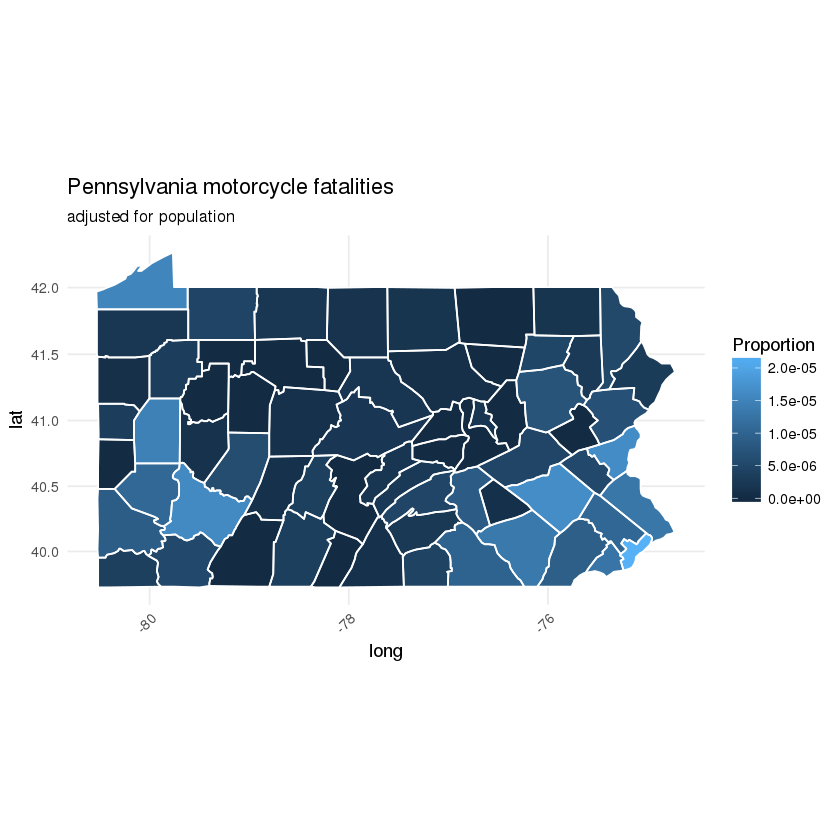

In [50]:
map.county <- map_data('county')
map.county <- as.data.frame(map.county)
map.county %<>% filter(region == "pennsylvania")
map.data <- left_join(map.county,prop_mcycle, by = c("subregion" = "county") )

ggplot(map.data, aes(x=long, y=lat, group=group, fill=prop)) + 
  geom_polygon()+coord_map() + theme_bw()+
  geom_path( colour = "white") + scale_fill_continuous(name = "Proportion")+
 labs(title = "Pennsylvania motorcycle fatalities") +
    labs(subtitle = "adjusted for population") +
    theme_minimal()+
    theme(axis.text.x = element_text(angle =45, hjust = 1))

In [48]:
library(data.table)   # use data table merge - it's *much* faster
map.county <- data.table(map_data('county'))
setkey(map.county,region,subregion)
obesity_map <- data.table(obesity_map)
setkey(obesity_map,state_names,county)
map.df      <- map.county[prop_mcycle]

ggplot(map.df, aes(x=long, y=lat, group=group, fill=prop)) + 
  geom_polygon()+coord_map() + theme_bw()+
  geom_path( colour = "white")

ERROR: Error in `[.data.table`(map.county, prop_mcycle): i has not evaluated to logical, integer or double
